**Корректность проверена на Python 3.7:**
+ numpy 1.14.5

# Доверительные интервалы для доли 

## Генерация данных

In [1]:
import numpy as np

In [2]:
print(np.__version__)

1.18.1


In [3]:
np.random.seed(1)

statistical_population = np.random.randint(2, size = 100000) 

random_sample = np.random.choice(statistical_population, size = 1000)

In [5]:
#истинное значение доли
statistical_population.mean()

0.49771

## Точечная оценка доли

In [6]:
random_sample.mean()

0.502

## Доверительный интервал для доли

In [4]:
from statsmodels.stats.proportion import proportion_confint

### Доверительный интервал на основе нормального распределения

$$\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$$

In [9]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

In [10]:
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.471010, 0.532990] with width 0.061979


### Доверительный интервал Уилсона

$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{
z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 

In [11]:
wilson_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'wilson')

In [12]:
print('wilson_interval [%f, %f] with width %f' % (wilson_interval[0],
                                                  wilson_interval[1],
                                                  wilson_interval[1] - wilson_interval[0]))

wilson_interval [0.471062, 0.532922] with width 0.061860


## Размер выборки для интервала заданной ширины

In [35]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [14]:
n_samples = int(np.ceil(samplesize_confint_proportion(random_sample.mean(), 0.01)))
n_samples

9604

In [59]:
np.random.seed(0)
random_sample = np.random.choice(statistical_population, size = n_samples)

NameError: name 'n_samples' is not defined

In [16]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

In [17]:
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1],
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.481776, 0.501773] with width 0.019997


In [19]:
gen = np.zeros((1, 50))
gen[:, 49] = 1
gen

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1.]])

In [15]:
gen_mean = gen.mean()
gen_std = gen.std(ddof=1)

In [49]:
gen.std?

In [41]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

In [54]:
np.round(_tconfint_generic(gen_mean, gen_std/np.sqrt(50), 49, 0.05, 'two-sided')[0], 4)

-0.0202

In [52]:
np.round?

In [60]:
np.random.seed(0)
proportion_confint(np.sum(gen), 50, method='wilson')

(0.003539259271646236, 0.10495443589637815)

In [65]:
np.random.seed(4)
proportion_confint(1, 50, method='normal')

(0.0, 0.05880530708179099)

In [33]:
50*0.02

1.0

In [36]:
int(np.ceil(samplesize_confint_proportion(gen.mean(), 0.01)))

753

In [67]:
p = np.linspace(0,1,num=100)
n_p = samplesize_confint_proportion(p, 0.01/2)

In [68]:
from matplotlib import pyplot as plt
%matplotlib inline

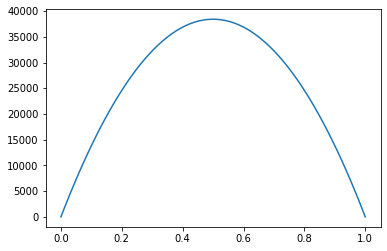

In [69]:
plt.plot(p, n_p)

In [70]:
n_p.max()

38410.66875094627

In [71]:
int(np.ceil(samplesize_confint_proportion(0.5, 0.01)))

9604